In [1]:
import random 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import xlwt
import xlrd
import openpyxl
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [2]:
xls = pd.ExcelFile("beike_new.xls")
df_beike = pd.read_excel(xls, 0)
df_beike = df_beike[(True^df_beike['经度'].isin([0]))]
df_beike = df_beike[(True^df_beike['纬度'].isin([0]))]

xls = pd.ExcelFile("ziroom_new.xls")
df_ziroom = pd.read_excel(xls, 0)
df_ziroom = df_ziroom[(True^df_ziroom['经度'].isin([0]))]
df_ziroom = df_ziroom[(True^df_ziroom['纬度'].isin([0]))]

xls = pd.ExcelFile("ziroom_new.xls")
df_ziroom = pd.read_excel(xls, 0)
df_ziroom = df_ziroom[(True^df_ziroom['经度'].isin([0]))]
df_ziroom = df_ziroom[(True^df_ziroom['纬度'].isin([0]))]

xls = pd.ExcelFile("58_new.xls")
df_58 = pd.read_excel(xls, 0)
df_58 = df_58[(True^df_58['经度'].isin([0]))]
df_58 = df_58[(True^df_58['纬度'].isin([0]))]
df_58 = df_58.drop(columns="小区")

xls = pd.ExcelFile("lianjia_new.xls")
df_lianjia = pd.read_excel(xls, 0)
df_lianjia = df_lianjia[(True^df_lianjia['经度'].isin([0]))]
df_lianjia = df_lianjia[(True^df_lianjia['纬度'].isin([0]))]

xls = pd.ExcelFile("anjuke_new.xls")
df_anjuke = pd.read_excel(xls, 0)
df_anjuke = df_anjuke[(True^df_anjuke['经度'].isin([0]))]
df_anjuke = df_anjuke[(True^df_anjuke['纬度'].isin([0]))]
df_anjuke = df_anjuke.drop(columns="小区")

df = df_ziroom.append(df_58)
df = df.append(df_lianjia)
df = df.append(df_anjuke)
df = df.append(df_beike)

df = df[pd.to_numeric(df['经度'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['纬度'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['室'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['厅'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['面积'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['价格'], errors='coerce').notnull()]

print(df[:5])

   Unnamed: 0          经度         纬度  室  厅      面积     价格
0           0  121.499917  31.272381  1  1   79.46   8790
1           1  121.521813  31.206273  2  1     102   9890
2           2  121.472869  31.284688  2  1   88.57   9990
3           3  121.496374  31.208895  2  1     143  13490
4           4  121.279576  31.327221  2  1  125.75   5390


In [3]:
from sklearn.decomposition import PCA 
def pca(data): 
    ''' input: dataframe containing Latitude(x) and Longitude(y) ''' 
    coordinates = data[['经度','纬度']].values 
    pca_obj = PCA().fit(coordinates) 
    pca_x = pca_obj.transform(data[['经度','纬度']])[:,0] 
    pca_y = pca_obj.transform(data[['经度','纬度']])[:,1] 
    data['经度']=pca_x
    data['纬度']=pca_y
    return pca_x, pca_y


In [36]:

df_y = df["价格"]
df_X = df.drop(columns=["价格"])
df_X = df_X.loc[:, ~df_X.columns.str.contains('^Unnamed')]
jd, wd = pca(df_X)

X = df_X.to_numpy()
y = df_y.to_numpy()

print(X.shape)
print(y.shape)
print(X[:5])
print(y[:5])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print(X_train.shape)
print(X_test.shape)

(20751, 5)
(20751,)
[[-0.047049034311960634 -0.062353649084384746 1 1 79.46]
 [-0.0706395623570557 0.003168785749445102 2 1 102.0]
 [-0.019693185054532505 -0.07396028789174473 2 1 88.57]
 [-0.04514149585909441 0.0012025177450498404 2 1 143.0]
 [0.1746306641870587 -0.1115033505522469 2 1 125.75]]
[8790 9890 9990 13490 5390]
(18675, 5)
(2076, 5)


In [37]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train.shape)

X_train = np.hstack((np.ones([len(X_train),1]), X_train))
X_test  = np.hstack((np.ones([len(X_test),1]), X_test))
y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_test  = scaler.fit_transform(y_test.reshape(-1,1))

print(X_train)

(18675, 5)
[[ 1.00000000e+00 -4.54140447e-05  5.42693356e-04  4.36637187e-02
   2.18318594e-02  9.98807566e-01]
 [ 1.00000000e+00  3.12001537e-03 -5.46715189e-03  3.65669032e-02
   3.65669032e-02  9.98642128e-01]
 [ 1.00000000e+00 -1.68859239e-03 -1.90963029e-04  2.28920612e-02
   1.52613741e-02  9.99620006e-01]
 [ 1.00000000e+00 -1.69399543e-03  8.11421815e-04  2.43757045e-02
   2.43757045e-02  9.99403883e-01]
 [ 1.00000000e+00  4.62599604e-03 -1.48840589e-04  3.33144734e-02
   0.00000000e+00  9.99434202e-01]
 [ 1.00000000e+00  1.18830767e-04 -2.32458713e-04  2.22143001e-02
   1.48095334e-02  9.99643504e-01]
 [ 1.00000000e+00  4.63473374e-04  1.12342015e-04  2.49915512e-02
   7.14044320e-03  9.99662047e-01]
 [ 1.00000000e+00 -5.87772176e-04 -1.25141110e-04  1.92263223e-02
   9.61316116e-03  9.99768761e-01]
 [ 1.00000000e+00 -1.93027116e-03  6.99418850e-04  3.07400767e-02
   3.07400767e-02  9.99052491e-01]
 [ 1.00000000e+00 -2.37258344e-04 -1.64651808e-04  9.80156620e-03
   1.96031324e

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train.shape)

X_train = np.hstack((np.ones([len(X_train),1]), X_train))
X_test  = np.hstack((np.ones([len(X_test),1]), X_test))
y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_test  = scaler.fit_transform(y_test.reshape(-1,1))

print(X_train)

(18675, 5)
[[ 1.00000000e+00 -1.27145270e-02  1.75684404e-01 -2.87998363e-01
  -6.72576396e-01 -7.11869334e-01]
 [ 1.00000000e+00  3.97979719e-01 -1.08852022e+00 -9.90593976e-01
  -6.72576396e-01 -9.20834342e-01]
 [ 1.00000000e+00 -1.04274115e+00 -1.85980003e-01  4.14597251e-01
   8.59175335e-01  2.54197203e-01]
 [ 1.00000000e+00 -6.56031762e-01  4.78150282e-01 -2.87998363e-01
   8.59175335e-01 -3.01078578e-01]
 [ 1.00000000e+00  6.49531038e-01 -3.69314401e-02 -9.90593976e-01
  -2.20432813e+00 -8.90350834e-01]
 [ 1.00000000e+00  7.24659514e-02 -2.32145151e-01  4.14597251e-01
   8.59175335e-01  2.99525838e-01]
 [ 1.00000000e+00  6.07044140e-01  2.23597459e-01  3.22497971e+00
   8.59175335e-01  1.94268886e+00]
 [ 1.00000000e+00 -5.77535159e-01 -1.93300542e-01  1.11719286e+00
   8.59175335e-01  1.12677343e+00]
 [ 1.00000000e+00 -5.93049402e-01  3.25382283e-01 -2.87998363e-01
   8.59175335e-01 -4.93725277e-01]
 [ 1.00000000e+00 -1.16680644e-01 -1.26331738e-01 -9.90593976e-01
   8.59175335e

### Gradient Descent

In [31]:
def calc_gradient(Y,X,w):  
    
    M = Y.shape[0]
    loss = np.sum(np.power(Y-np.dot(X,w),2)) / (2*M)
    gradient = np.dot(X.T ,np.dot(X,w)-Y)/M
        
    
    return {'gradient': gradient,'loss': loss}

In [38]:
alphas = [0.3,0.05,0.01]
losses = [[],[],[]]
test_losses = []
for ind,alpha in enumerate(alphas):
    print("ALPHA:",alpha)
    w = np.ones([X_train.shape[1],1])
    for epoch in range(100):
        output = calc_gradient(y_train,X_train,w)
        
        #print("Loss for epoch",epoch,":",output['loss'])
        
        losses[ind].append(output['loss'])
        for i in range(w.shape[0]):
            w[i] -= alpha*output['gradient'][i]
    
    test_output = calc_gradient(y_test,X_test,w)
    print("Train Loss",epoch,":",output['loss'])
    test_losses.append(test_output['loss'])
    print("Test Loss",epoch,":",test_output['loss'])

ALPHA: 0.3
Train Loss 99 : 0.00017713341738051887
Test Loss 99 : 0.00013883216318451075
ALPHA: 0.05
Train Loss 99 : 0.0001787459231838501
Test Loss 99 : 0.00014015202348295342
ALPHA: 0.01
Train Loss 99 : 0.010120358315236583
Test Loss 99 : 0.009540008534966548


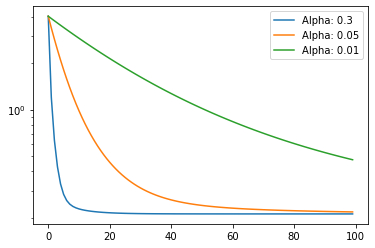

In [33]:
for ind,alpha in enumerate(alphas):
    plt.semilogy(losses[ind], label = "Alpha: "+str(alpha))
plt.legend()

In [39]:
print("Train error: %.5f" % losses[0][-1])
print("Test  error: %.5f" % test_losses[0])

Train error: 0.00018
Test  error: 0.00014


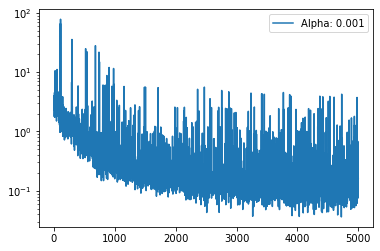

In [10]:
random.seed(215)
batch_losses = []
w = np.ones([X_train.shape[1],1])
for _ in range(5000):
    
    # create a random batch of 50 points and follow gradient
    X_batch, y_batch = zip(*random.sample(list(zip(X_train, y_train)), k=50))
    X_batch, y_batch = np.asarray(X_batch),np.asarray(y_batch)
    # apply batch gradient descent
    alpha = 0.001
    output = calc_gradient(y_batch,X_batch,w)
    for i in range(w.shape[0]):
        w[i] -= alpha*output['gradient'][i]
    
    # store the loss 
    batch_losses.append(output['loss'])
    

test_output = calc_gradient(y_test,X_test,w)
test_loss = test_output['loss']
# plot
plt.semilogy(batch_losses, label = "Alpha: "+str(alpha));
plt.legend();

In [11]:
print("Train error: %.5f" % batch_losses[-1])
print("Test error : %.5f" % test_loss)

Train error: 0.16226
Test error : 0.19722


### Polynomial Regression

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


X_train = np.hstack((np.ones([len(X_train),1]), X_train))
X_test  = np.hstack((np.ones([len(X_test),1]), X_test))

y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_test  = scaler.fit_transform(y_test.reshape(-1,1))

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline # model
from sklearn.metrics import mean_squared_error # test 


def ply_reg(k):
    
    model = Pipeline([('poly',PolynomialFeatures(degree=k)),
                     ('linear',LinearRegression())])
    model = model.fit(X_train,y_train)
    
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    
    train_mse = mean_squared_error(train_predict,y_train)
    test_mse = mean_squared_error(test_predict, y_test)
    return (train_mse,test_mse)

print(ply_reg(2))

(0.36551406918683066, 0.3545414456077959)


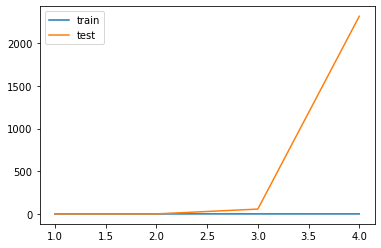

In [19]:
train_mse = []
test_mse = []

for i in range(1,5):
    result = ply_reg(i)
    train_mse.append(result[0])
    test_mse.append(result[1])

plt.plot([i for i in range(1,5)],np.sqrt(train_mse),label='train')
plt.plot([i for i in range(1,5)],np.sqrt(test_mse),label='test')
plt.legend()
plt.show()

### SVM

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Design the pipeline as a sequence of steps each step
# is specified as a tuple ('name',model). We will refer
# to this name later.
pipeline = Pipeline([
    ('mm',   MinMaxScaler()),
    ('ploy', PolynomialFeatures()),
    ('sgd',  SGDRegressor(penalty="l2",max_iter=1000,tol=1e-4,alpha=0,random_state=0)),
])

# Train using the whole pipeline using just 1 call!
pipeline.fit(X_train,y_train)

# Report the MSE error on the test-set by calling
pred_t = pipeline.predict(X_train)
mse_t = mean_squared_error(pred_t, y_train)
print("Pipeline Train MSE %.2f" % mse_t)

pred = pipeline.predict(X_test)

mse = mean_squared_error(pred, y_test)
print("Pipeline MSE %.2f" % mse)

Pipeline Train MSE 68894264.26
Pipeline MSE 66895761.87


In [19]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# Define the parameter search space using a dictionary with entries:
#    { 'name__parameter' : range }
# name:  refers to the name of the pipeline step in which you are 
#        changing a variable
# range: can be a tuple, a list or a distribution.
parameters = {
    'poly__degree' : [1,2],                             # specify the degree of the polynomial here
    'sgd__alpha'   : np.logspace(-5,1,7)   # search range for parameter α
                                           # in the sgd step of the pipeline
}

# set-up the grid-search
grid_search = GridSearchCV(
    pipeline,                             # the ML pipeline we wish to test
    parameters,                              # all parameter settings
    scoring='neg_mean_squared_error', # the scoring metric to calculate
                                      # since this maximizes, we use -MSE
    cv=TimeSeriesSplit(n_splits=5), # how to design the folds
    return_train_score=True           # useful for debugging, calculate the trainset
                                      # performance
)

# start the gridsearch
grid_search.fit(X_train,y_train)

ValueError: Invalid parameter poly for estimator Pipeline(steps=[('mm', MinMaxScaler()), ('ploy', PolynomialFeatures()),
                ('sgd', SGDRegressor(alpha=0, random_state=0, tol=0.0001))]). Check the list of available parameters with `estimator.get_params().keys()`.